#DATA UNDERSTANDING

##Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

##Load Data

In [ ]:
dataset = pd.read_csv("dataset_2.csv")

##Melihat Sample Data

In [ ]:
# Menampilkan 5 baris pertama data
dataset.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


##Mengecek Dimensi Data

In [ ]:
# Melihat jumlah baris dan kolom
dataset.shape

(309, 16)

##Mengecek Tipe Data & Nilai Kosong

In [ ]:
# Melihat informasi tipe data dan memori
dataset.info()

# Menghitung jumlah nilai yang hilang (NaN/Null) di setiap kolom
dataset.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

,0
GENDER,0
AGE,0
SMOKING,0
YELLOW_FINGERS,0
ANXIETY,0
PEER_PRESSURE,0
CHRONIC DISEASE,0
FATIGUE,0
ALLERGY,0
WHEEZING,0


##Mengecek Data Duplikat

In [ ]:
# Cek jumlah total data
print(f"Total Baris Data: {dataset.shape[0]}")

# Cek duplikasi
duplikat = dataset.duplicated().sum()
print(f"Jumlah Data Duplikat: {duplikat}")

Total Baris Data: 309
Jumlah Data Duplikat: 33


##Eksplorasi Target

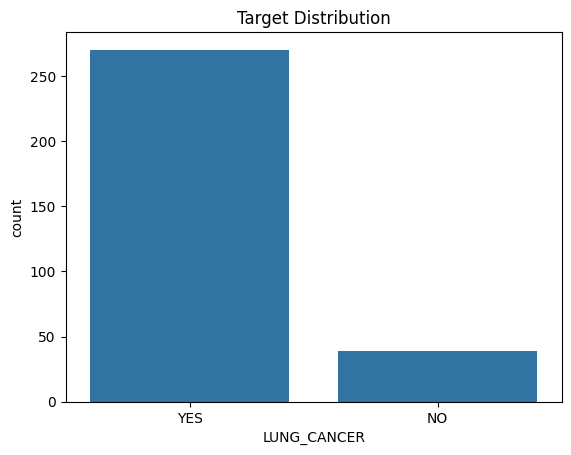

In [ ]:
# Menghitung jumlah kategori pada kolom target
dataset['LUNG_CANCER'].value_counts()

# Visualisasi sebaran data target menggunakan diagram batang
sns.countplot(x='LUNG_CANCER', data=dataset)
plt.title('Target Distribution')
plt.show()

#DATA PREPROCESSING

##Menghapus Data Duplikat

In [ ]:
# Menghapus baris yang duplikat
dataset = dataset.drop_duplicates()

##Menghapus Kolom yang Tidak Digunakan

In [ ]:
columns_to_drop = ['ANXIETY', 'PEER_PRESSURE', 'CHRONIC DISEASE',
                   'GENDER', 'AGE', 'ALCOHOL CONSUMING']
# Use 'dataset' as the source DataFrame, as 'df' might not be correctly initialized or contain these columns.
df_clean = dataset.drop(columns=columns_to_drop)

##Encoding

In [ ]:
label_encoder = LabelEncoder()
dataset['LUNG_CANCER'] = label_encoder.fit_transform(dataset['LUNG_CANCER'])

##Transformasi Fitur (Mengubah nilai 1 & 2 menjadi 0 & 1)

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

columns_to_transform = ['SMOKING', 'YELLOW_FINGERS', 'FATIGUE', 'ALLERGY',
                        'WHEEZING', 'COUGHING', 'SHORTNESS OF BREATH',
                        'SWALLOWING DIFFICULTY', 'CHEST PAIN']

print("Cek Data Setelah Preprocessing:")
print(dataset.head())

Cek Data Setelah Preprocessing:
  GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0      M   69        1               2        2              1   
1      M   74        2               1        1              1   
2      F   59        1               1        1              2   
3      M   63        2               2        2              1   
4      F   63        1               2        1              1   

   CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                1         2         1         2                  2         2   
1                2         2         2         1                  1         1   
2                1         2         1         2                  1         2   
3                1         1         1         1                  2         1   
4                1         1         1         2                  1         2   

   SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN  LUNG_CANCER  
0          

##Memisahkan Fitur (x) dan Target (y)

In [ ]:
# X adalah semua kolom KECUALI 'LUNG_CANCER'
X = dataset.drop('LUNG_CANCER', axis=1)

# y adalah kolom 'LUNG_CANCER' saja
y = dataset['LUNG_CANCER']

##Membagi Data Latih dan Data Uji

In [ ]:
from sklearn.model_selection import train_test_split

# Membagi data: 80% Training, 20% Testing
sc = StandardScaler()
label_encoder_gender = LabelEncoder()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

##Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

X_train['GENDER'] = label_encoder_gender.fit_transform(X_train['GENDER'])
X_test['GENDER'] = label_encoder_gender.transform(X_test['GENDER'])

# Menyesuaikan skala data training dan testing.
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#MODELING

##Membuat dan Melatih Model KNN

In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)


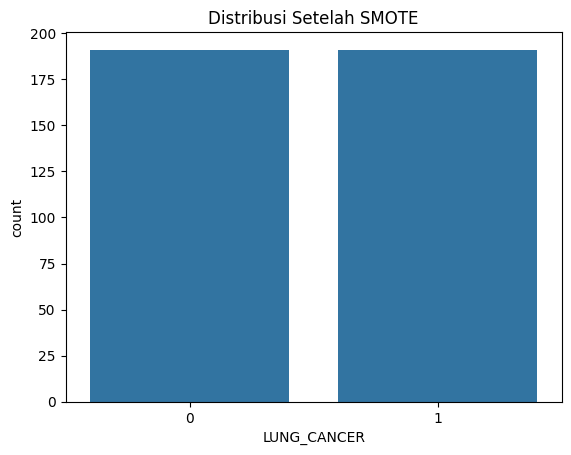

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=y_train_res)
plt.title("Distribusi Setelah SMOTE")
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(X_train_res, y_train_res)   # pakai data hasil SMOTE

KNeighborsClassifier()

##Prediksi

In [ ]:
# Memprediksi hasil test set
y_pred = classifier.predict(X_test)

##Evaluasi Model

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score, precision_score, recall_score

# 1. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# 2. Menghitung Akurasi (Accuracy)
acc = accuracy_score(y_test, y_pred)
print(f"\nAkurasi Model: {acc}")

# 3. Menampilkan Laporan Lengkap (Precision, Recall, F1-Score)
# classification_report otomatis menghitung metrik untuk setiap kelas (0 dan 1)
print("\nLaporan Klasifikasi Lengkap:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[ 9  0]
 [ 5 42]]

Akurasi Model: 0.9107142857142857

Laporan Klasifikasi Lengkap:
              precision    recall  f1-score   support

           0       0.64      1.00      0.78         9
           1       1.00      0.89      0.94        47

    accuracy                           0.91        56
   macro avg       0.82      0.95      0.86        56
weighted avg       0.94      0.91      0.92        56



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=3, metric='minkowski', p=2)
classifier.fit(X_train_res, y_train_res)   # pakai data hasil SMOTE

KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Memprediksi hasil test set
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score, precision_score, recall_score

# 1. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# 2. Menghitung Akurasi (Accuracy)
acc = accuracy_score(y_test, y_pred)
print(f"\nAkurasi Model: {acc}")

# 3. Menampilkan Laporan Lengkap (Precision, Recall, F1-Score)
# classification_report otomatis menghitung metrik untuk setiap kelas (0 dan 1)
print("\nLaporan Klasifikasi Lengkap:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[ 8  1]
 [ 5 42]]

Akurasi Model: 0.8928571428571429

Laporan Klasifikasi Lengkap:
              precision    recall  f1-score   support

           0       0.62      0.89      0.73         9
           1       0.98      0.89      0.93        47

    accuracy                           0.89        56
   macro avg       0.80      0.89      0.83        56
weighted avg       0.92      0.89      0.90        56



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=4, metric='minkowski', p=2)
classifier.fit(X_train_res, y_train_res)   # pakai data hasil SMOTE

KNeighborsClassifier(n_neighbors=4)

In [ ]:
# Memprediksi hasil test set
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score, precision_score, recall_score

# 1. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# 2. Menghitung Akurasi (Accuracy)
acc = accuracy_score(y_test, y_pred)
print(f"\nAkurasi Model: {acc}")

# 3. Menampilkan Laporan Lengkap (Precision, Recall, F1-Score)
# classification_report otomatis menghitung metrik untuk setiap kelas (0 dan 1)
print("\nLaporan Klasifikasi Lengkap:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[ 9  0]
 [ 6 41]]

Akurasi Model: 0.8928571428571429

Laporan Klasifikasi Lengkap:
              precision    recall  f1-score   support

           0       0.60      1.00      0.75         9
           1       1.00      0.87      0.93        47

    accuracy                           0.89        56
   macro avg       0.80      0.94      0.84        56
weighted avg       0.94      0.89      0.90        56

